In [129]:
from __future__ import absolute_import

import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = np.loadtxt('data/fer2013/fer2013.csv', skiprows=1, delimiter=',', dtype=np.str)

In [21]:
train_data = data[np.argwhere(data[:, 2] == 'Training').ravel()]
validation_data = data[np.argwhere(data[:, 2] == 'PrivateTest').ravel()]
test_data = data[np.argwhere(data[:, 2] == "PublicTest").ravel()]

In [96]:
train_X = train_data[:, 1]
validation_X = validation_data[:, 1]
test_X = test_data[:, 1]

In [97]:
train_y = train_data[:, 0].astype(np.int32)
validation_y = validation_data[:, 0].astype(np.int32)
test_y = test_data[:, 0].astype(np.int32)

In [98]:
train_n, = train_X.shape
validation_n, = validation_X.shape
test_n, = test_X.shape
train_X = np.array([[int(j) for j in train_X[i].split(' ')] for i in range(train_n)])
validation_X = np.array([[int(j) for j in validation_X[i].split(' ')] for i in range(validation_n)])
test_X = np.array([[int(j) for j in test_X[i].split(' ')] for i in range(test_n)])

## Preprocessing

### Image Display

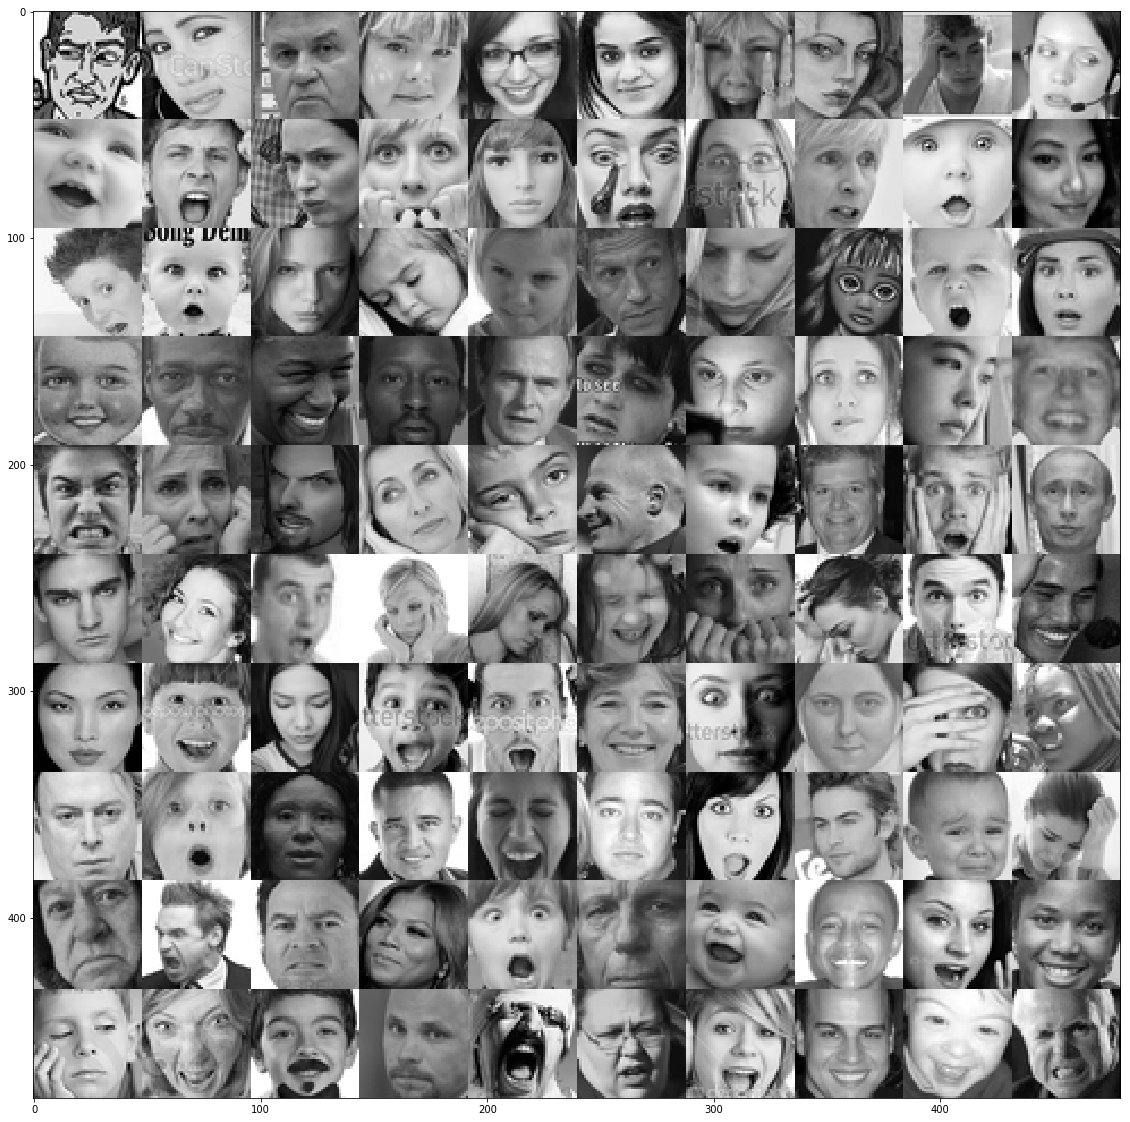

In [116]:
display_n = 10
display_data = test_X[:display_n * display_n, :]
canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = display_data[i, :].reshape(48, 48)
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = image
plt.figure(figsize=(20, 20))
plt.imshow(canvas,cmap='gray')

### Per Image Standardization

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfu

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/ZweNaing/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


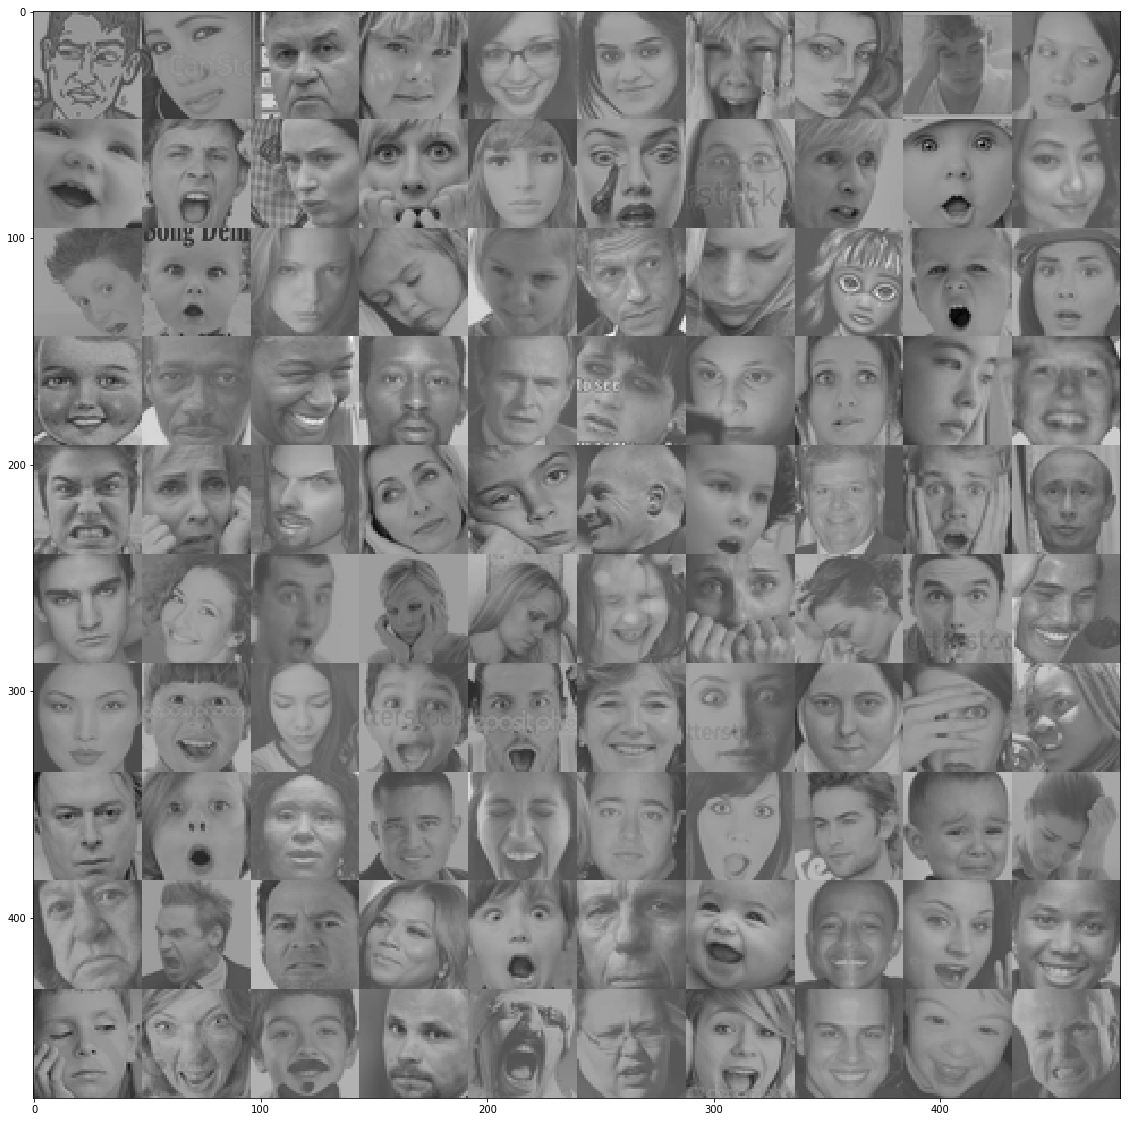

In [196]:
sess = tf.InteractiveSession()
display_n = 10
display_data = test_X[:display_n * display_n, :]
canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = tf.image.per_image_standardization(display_data[i, :].reshape(48, 48, 1)) 
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = tf.reshape(image, [48, 48]).eval()
plt.figure(figsize=(20, 20))
plt.imshow(canvas,cmap='gray')

### Per pixel standardization

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


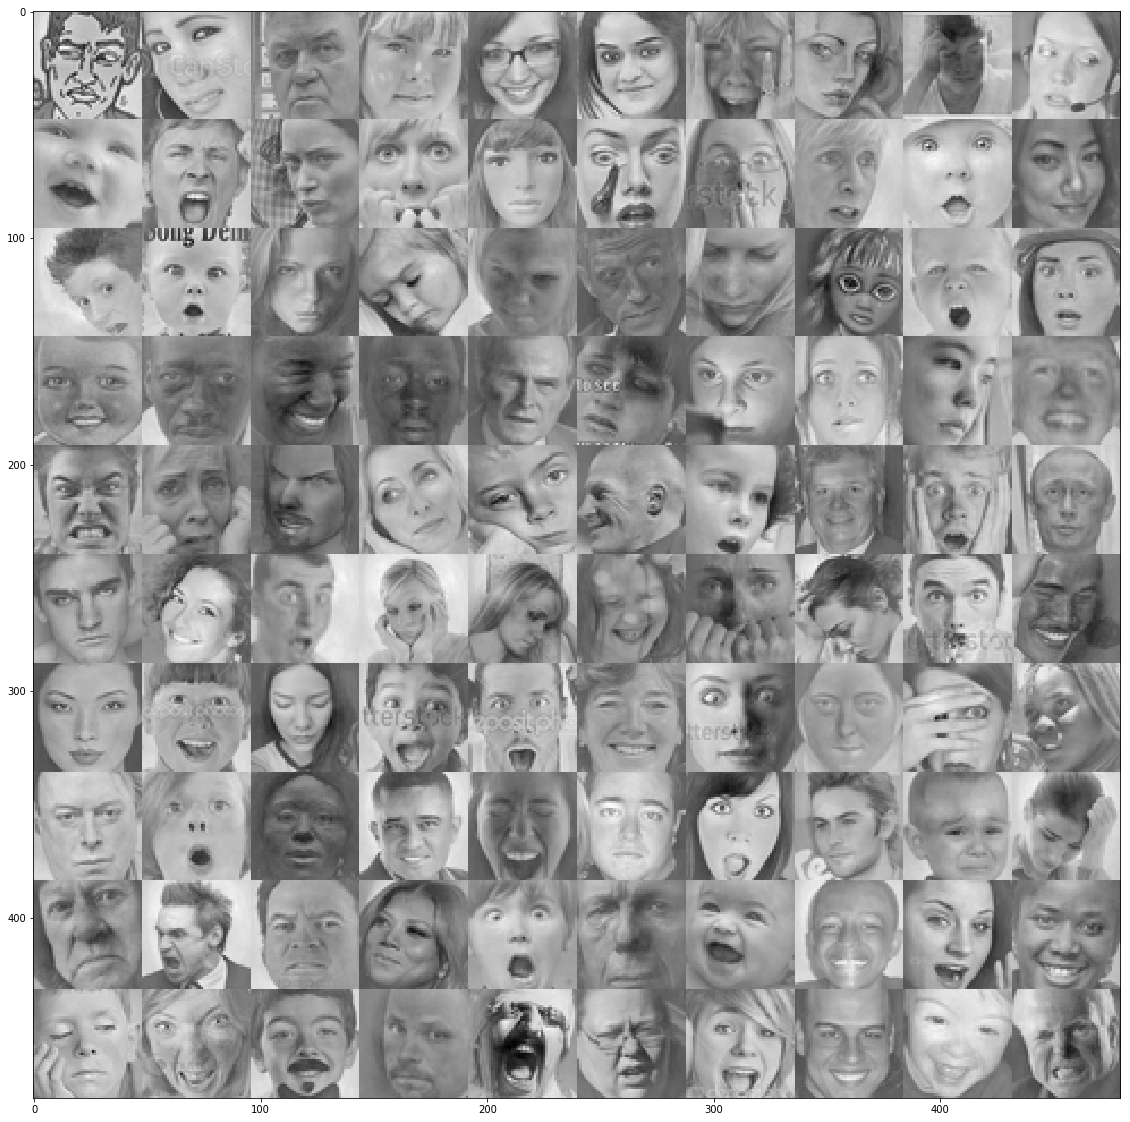

In [194]:
from sklearn.preprocessing import scale
sess = tf.InteractiveSession()
display_n = 10
display_data = test_X[:display_n * display_n, :]
standardized_data = scale(display_data, axis=0)

canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = standardized_data[i, :].reshape(48, 48)
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = image
plt.figure(figsize=(20, 20))
plt.imshow(canvas,cmap='gray')

### Image Random Flip

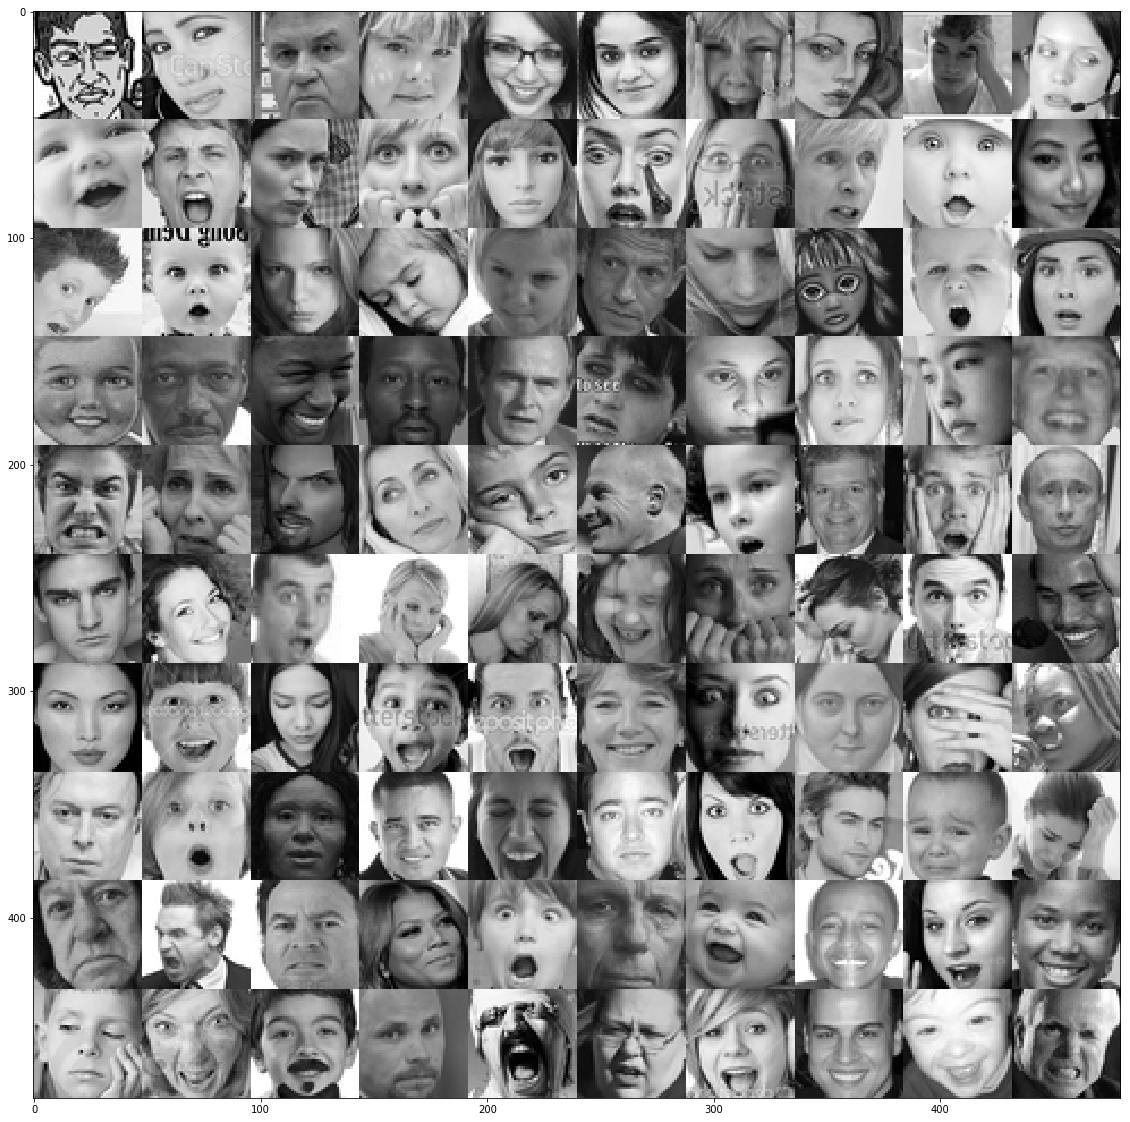

In [127]:
sess = tf.InteractiveSession()
display_n = 10
display_data = test_X[:display_n * display_n, :]
canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = tf.image.random_flip_left_right(display_data[i, :].reshape(48, 48, 1)) 
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = tf.reshape(image, [48, 48]).eval()
plt.figure(figsize=(20, 20))
plt.imshow(canvas,cmap='gray')

### Image Random Rotation

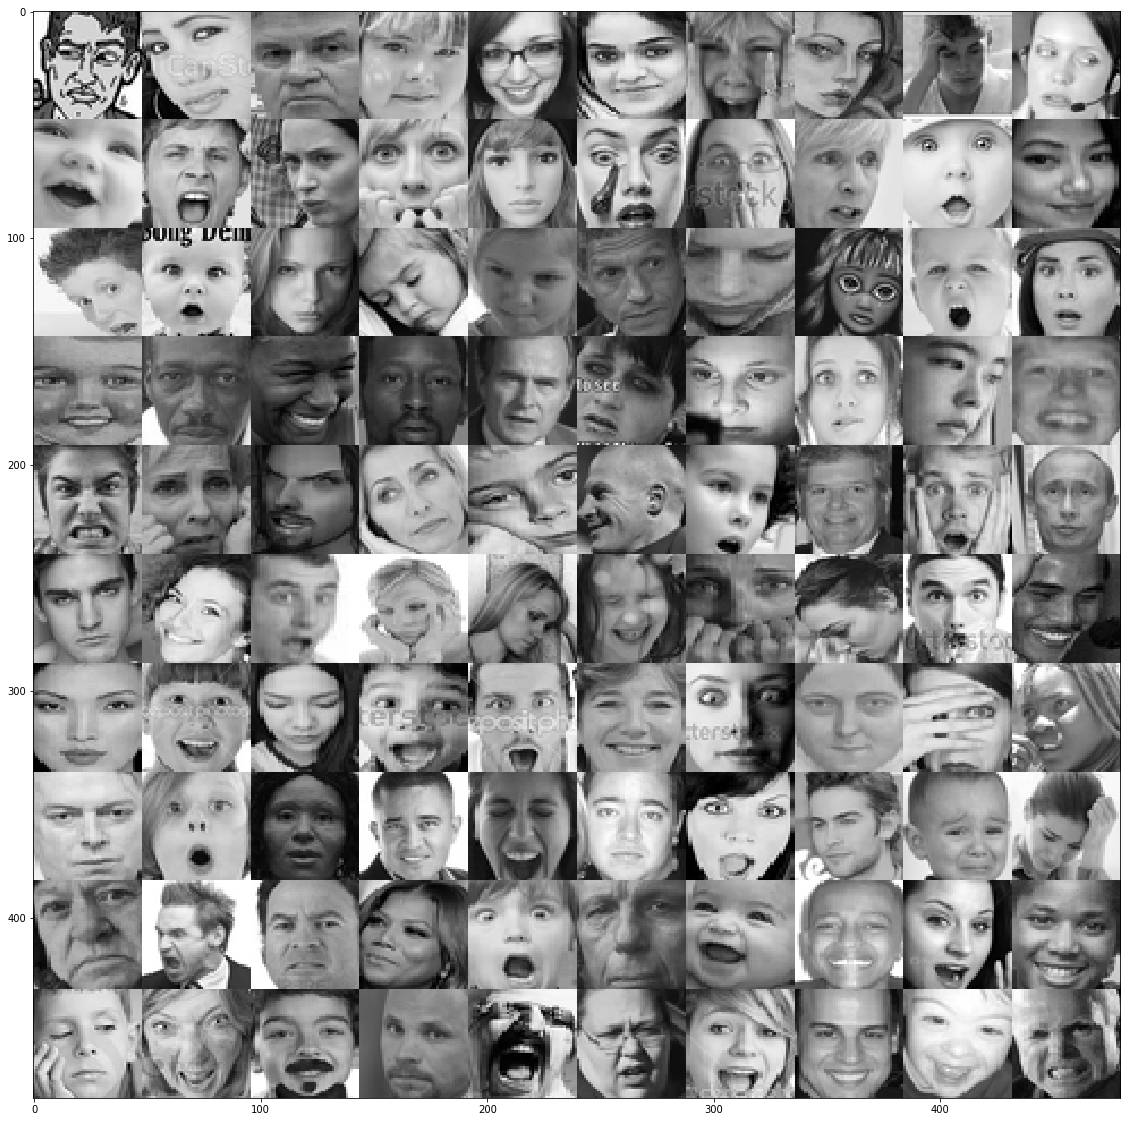

In [139]:
sess = tf.InteractiveSession()
display_n = 10
display_data = test_X[:display_n * display_n, :]
canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = tf.keras.preprocessing.image.random_rotation(display_data[i, :].reshape([48, 48, 1]), 45) 
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = tf.reshape(image, [48, 48]).eval()
plt.figure(figsize=(20, 20))
plt.imshow(canvas,cmap='gray')

### Image Random Crop 

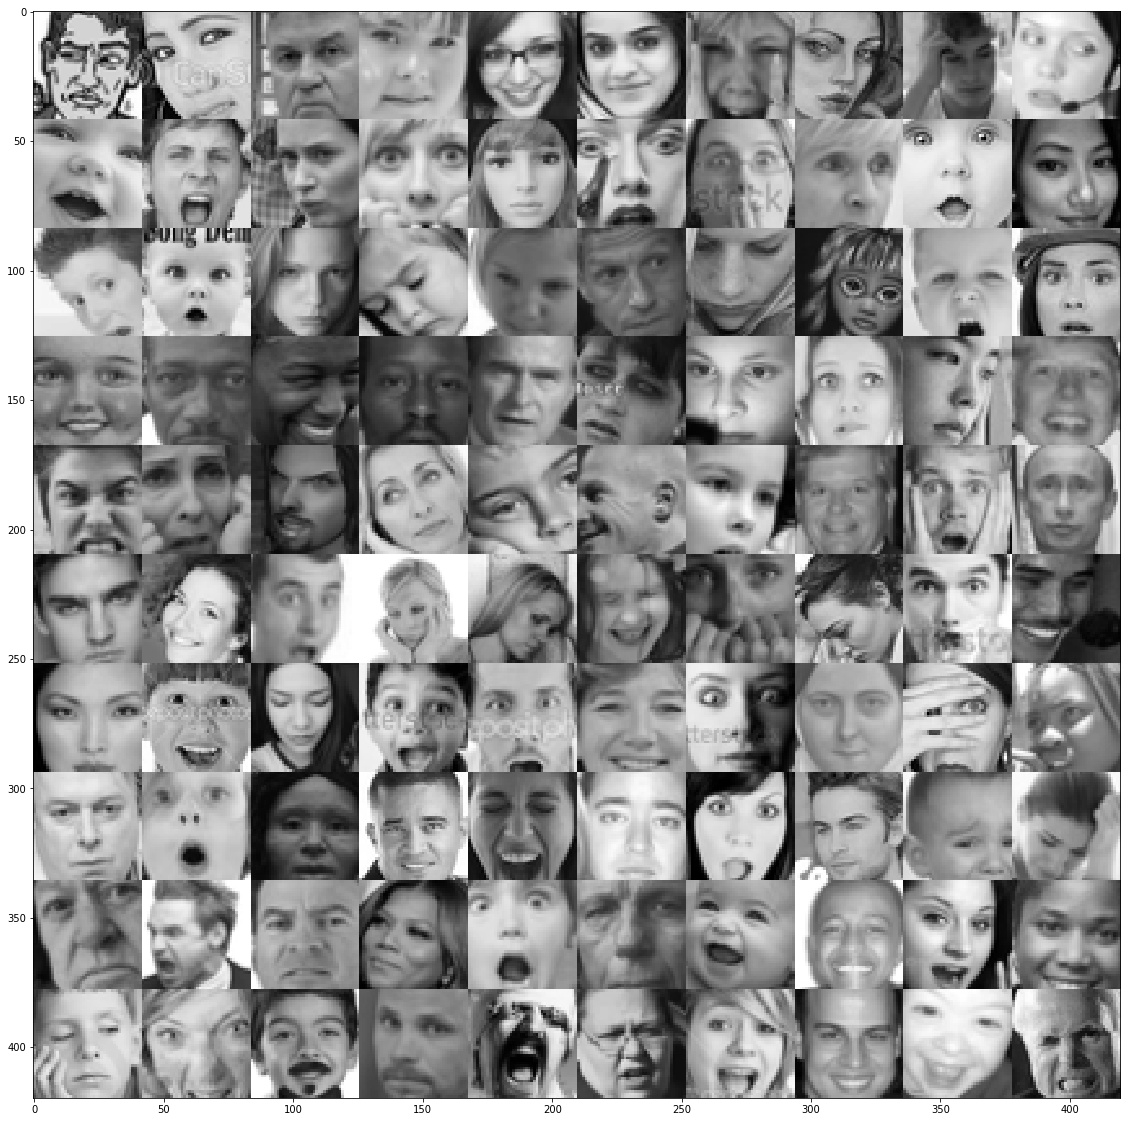

In [183]:
sess = tf.InteractiveSession()
crop_size = 42
display_n = 10
display_data = test_X[:display_n * display_n, :]
canvas = np.empty((42 * display_n, 42 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = test_X[i, :].reshape([48, 48, 1])
    rescaled_size = np.random.randint(43, 54)
    offset = np.random.randint(0, rescaled_size - crop_size)
    rescaled_image = tf.image.resize_images(image, [rescaled_size, rescaled_size])
    cropped_image = tf.image.crop_to_bounding_box(rescaled_image, offset, offset, crop_size, crop_size)
    canvas[p * 42 : (p + 1) * 42, q * 42 : (q + 1) * 42] = tf.reshape(cropped_image, [42, 42]).eval()
plt.figure(figsize=(20, 20))
plt.imshow(canvas,cmap='gray')